In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from VR_algorithm import VR_algorithm
from cost_func import *
from read_data import *

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, Y = read_mnist(datatype = 'multiclass', mask_label = [0, 1, 2, 3, 4, 5, 6, 7 ,8 ,9])

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/MNIST_data\t10k-labels-idx1-ubyte.gz
Extracting ./data/MNIST_data\train-images-idx3-ubyte.gz
Extracting ./data/MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./data/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./data/MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
N = X.shape[0]
D = X.shape[1]
C = Y.shape[1]

N_train_prctg, N_val_prctg = 0.4, 0.1
N_train = int(N * N_train_prctg)
N_val = int(N * N_val_prctg)

X_train, Y_train = X[0:N_train, :], Y[0:N_train, :]
X_val, Y_val = X[N_train: N_train+N_val, :], Y[N_train: N_train+N_val, :]
X_test, Y_test = X[N_train+N_val:N+1, :], Y[N_train+N_val:N+1, :]

y_train, y_val, y_test = np.argmax(Y_train, axis = 1), np.argmax(Y_val, axis = 1), np.argmax(Y_test, axis = 1)

In [5]:
print (Y_test.shape)

(27500, 10)


In [6]:
print (Y_train[0:10,:])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


# Train the model

In [93]:
C_lr=1
y_t=np.argmax(Y_train, axis = 1)
lr = LogisticRegression(tol=1e-7, C=C_lr, fit_intercept=False, multi_class='multinomial',solver='sag')
lr

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=1e-07, verbose=0, warm_start=False)

In [94]:
lr.fit(X_train, y_t)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=1e-07, verbose=0, warm_start=False)

In [95]:
lr.score(X_test, np.argmax(Y_test, axis = 1))

0.90825454545454543

In [96]:
w_opt = lr.coef_.reshape(-1,1)

In [98]:
N_epoch = 10
rho = 1/C_lr/X_train.shape[0]
w_star = np.random.rand(C*D, 1) * 0.0
params= {'using_sgd': 1, 'epoch_per_FG': 2, 'minibatch': 1}

In [99]:
avrg = VR_algorithm(X_train, Y_train , w_opt, soft_max, rho = rho)
MSD, ER = avrg.train(N_epoch=N_epoch, mu=.5, method='SVRG', replace = False, **params)
w_svrg = avrg.cost_model.w

epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10


In [100]:
W_svrg = w_svrg.reshape(D, C, order = 'F')
y_train_pred = np.argmax(X_train.dot(W_svrg), axis = 1)
print ('training accuracy: %f' % np.mean(y_train == y_train_pred) )
y_val_pred = np.argmax(X_val.dot(W_svrg), axis = 1)
print ('validation accuracy: %f' % np.mean(y_val == y_val_pred)  )

training accuracy: 0.916045
validation accuracy: 0.893273


In [101]:
y_test_pred = np.argmax(X_test.dot(W_svrg), axis = 1)
print ('test accuracy: %f' % (np.mean(y_test == y_test_pred) ))

test accuracy: 0.908218


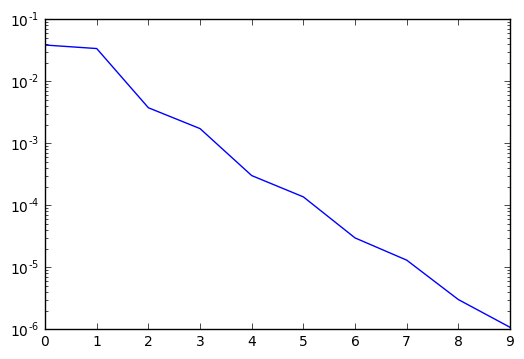

In [102]:
plt.semilogy(MSD)

In [90]:
w_opt = w_svrg

In [91]:
N_epoch=15
avrg = VR_algorithm(X_train, Y_train , w_opt, soft_max, rho = rho)
MSD, ER = avrg.train(N_epoch=N_epoch, mu=.5, method='AVRG', replace = False, **params)
w_svrg = avrg.cost_model.w

epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15


In [108]:
x=np.array([1,2])
y=np.array([3,4])
np.vstack( [x,y])

array([[1, 2],
       [3, 4]])